In [ ]:
# default_exp examples00

In [ ]:
#hide
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#hide
!pip install nbdev
!pip install fastcore

In [ ]:
#hide
% cd /content/drive/My\ Drive/fa_convnav

/content/drive/My Drive/fa_convnav


In [ ]:
#hide
#not deps but we need them to use nbdev and run tests
from nbdev import * 
from nbdev.showdoc import *
from fastcore.test import *

# Examples00

> Examples of fa_convnav usage.

In [ ]:
!pip install fastai2

In [ ]:
from fastai2.basics import *
from fastai2.callback.all import *
from fastai2.vision.all import *
from torch import torch
from fa_convnav.navigator import *

In [ ]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                 get_items=get_image_files, 
                 splitter=RandomSplitter(),
                 get_y=RegexLabeller(pat = r'/([^/]+)_\d+.jpg$'),
                 item_tfms=Resize(460),
                 batch_tfms=[*aug_transforms(size=224, max_rotate=30, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])

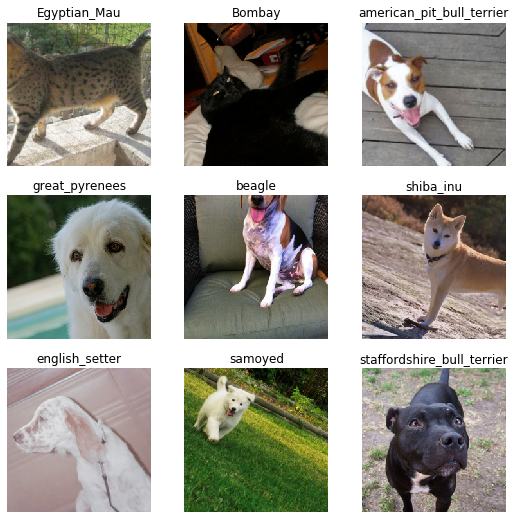

In [ ]:
dls = pets.dataloaders(untar_data(URLs.PETS)/"images",  bs=128)
dls.show_batch(max_n=9)

In [ ]:
model = resnet50

In [ ]:
learn = cnn_learner(
    dls, 
    model, 
    opt_func=partial(Adam, lr=slice(3e-3), wd=0.01, eps=1e-8), 
    metrics=error_rate, 
    config=cnn_config(ps=0.33)).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 111MB/s]


In [ ]:
cn = ConvNav(learn, layer_info(learn))

In [ ]:
print(cn.model_info)

Resnet: Resnet50
Input shape: [128, 3, 224, 224] (bs, ch, h, w)
Output features: [128, 37] (bs, classes)
Currently frozen to parameter group 3 out of 3


In [ ]:
cn.head

Resnet: Resnet50
Input shape: [128, 2048, 7, 7] (bs, filt, h, w)
Output features: [128, 37] (bs, classes)



,Layer_name,Model,Division,Module,Block,Layer_description,Torch_class,Output_dimensions,Parameters,Trainable
Index,,,,,,,,,,
150,1,,Sequential,,,,torch.nn.modules.container.Sequential,,,
151,1.0,,,AdaptiveConcatPool2d,,,fastai2.layers.AdaptiveConcatPool2d,,,
152,1.0.ap,,,,,AdaptiveAvgPool2d(output_size=1),torch.nn.modules.pooling.AdaptiveAvgPool2d,"[128, 2048, 1, 1]",0,False
153,1.0.mp,,,,,AdaptiveMaxPool2d(output_size=1),torch.nn.modules.pooling.AdaptiveMaxPool2d,"[128, 2048, 1, 1]",0,False
154,1.1,,,Flatten,,full: False,fastai2.layers.Flatten,"[128, 4096]",0,False
155,1.2,,,BatchNorm1d,,"BatchNorm1d(4096, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)",torch.nn.modules.batchnorm.BatchNorm1d,"[128, 4096]",8192,True
156,1.3,,,Dropout,,"Dropout(p=0.165, inplace=False)",torch.nn.modules.dropout.Dropout,"[128, 4096]",0,False
157,1.4,,,Linear,,"Linear(in_features=4096, out_features=512, bias=False)",torch.nn.modules.linear.Linear,"[128, 512]",2097152,True
158,1.5,,,ReLU,,ReLU(inplace=True),torch.nn.modules.activation.ReLU,"[128, 512]",0,False


### Test function

In [ ]:
#export
def examples_test(test):
  "Examples function"
  print(test)

In [ ]:
examples_test('test')

test


In [ ]:
from importlib import reload  
reload(fa_convnav.navigator)

NameError: ignored